In [1]:



import pandas as pd

In [2]:
df=pd.read_csv("/Users/ravikantverma/Desktop/uber data analytics/uber-etl-pipeline-data-engineering-project-main/data/uber_data.csv")

df.head()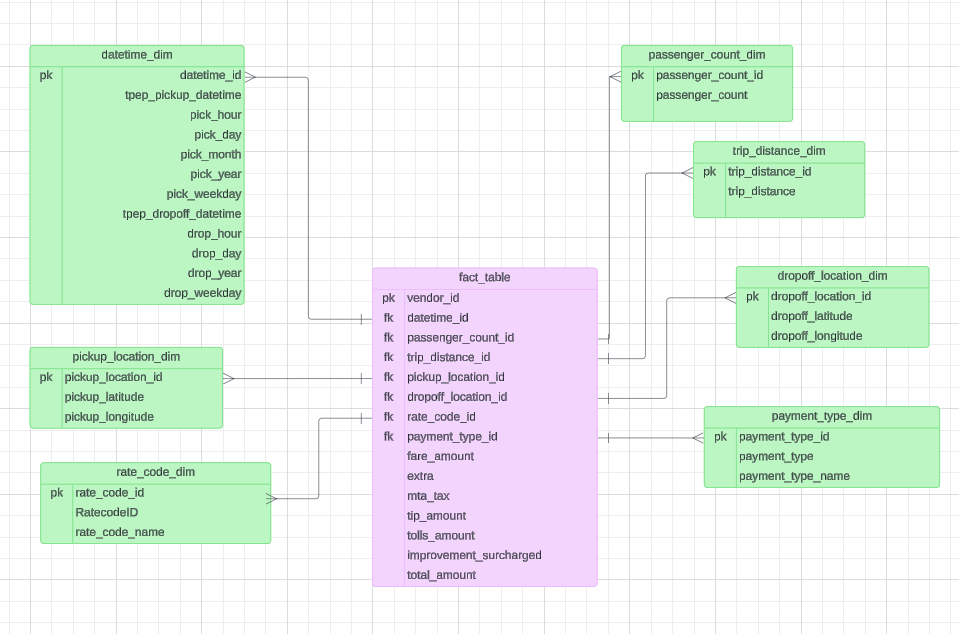

In [3]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

In [4]:
#convert the null format into datetime format
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])

In [5]:
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [6]:
df = df.drop_duplicates().reset_index(drop=True)
df['trip_id'] = df.index

In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_id
0,1,2016-03-01,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,0
1,1,2016-03-01,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,1
2,2,2016-03-01,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,2
3,2,2016-03-01,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,3
4,2,2016-03-01,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,4


In [8]:
#reassigning pickup variables using datetime_dim
datetime_dim =df[['tpep_pickup_datetime','tpep_dropoff_datetime']].reset_index(drop=True)

In [9]:
#pickup datetime dim variables
datetime_dim['tpep_pickup_datetime']=datetime_dim['tpep_pickup_datetime']
datetime_dim['pick_hour']=datetime_dim['tpep_pickup_datetime'].dt.hour
datetime_dim['pick_day']=datetime_dim['tpep_pickup_datetime'].dt.day
datetime_dim['pick_month']=datetime_dim['tpep_pickup_datetime'].dt.month
datetime_dim['pick_year']=datetime_dim['tpep_pickup_datetime'].dt.year
datetime_dim['pick_weekday']=datetime_dim['tpep_pickup_datetime'].dt.weekday

In [10]:
#drop datetime dim variables
datetime_dim['tpep_dropoff_datetime']=datetime_dim['tpep_dropoff_datetime']
datetime_dim['drop_hour']=datetime_dim['tpep_dropoff_datetime'].dt.hour
datetime_dim['drop_day']=datetime_dim['tpep_dropoff_datetime'].dt.day
datetime_dim['drop_month']=datetime_dim['tpep_dropoff_datetime'].dt.month
datetime_dim['drop_year']=datetime_dim['tpep_dropoff_datetime'].dt.year
datetime_dim['drop_weekday']=datetime_dim['tpep_dropoff_datetime'].dt.weekday

In [11]:
datetime_dim['datetime_id']=datetime_dim.index


In [12]:
datetime_dim=datetime_dim[['datetime_id','tpep_pickup_datetime','pick_hour','pick_day','pick_month','pick_year','pick_weekday',
                          'tpep_dropoff_datetime','drop_hour','drop_day','drop_year','drop_weekday']]


In [13]:
datetime_dim.head()

,datetime_id,tpep_pickup_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,tpep_dropoff_datetime,drop_hour,drop_day,drop_year,drop_weekday
0,0,2016-03-01,0,1,3,2016,1,2016-03-01 00:07:55,0,1,2016,1
1,1,2016-03-01,0,1,3,2016,1,2016-03-01 00:11:06,0,1,2016,1
2,2,2016-03-01,0,1,3,2016,1,2016-03-01 00:31:06,0,1,2016,1
3,3,2016-03-01,0,1,3,2016,1,2016-03-01 00:00:00,0,1,2016,1
4,4,2016-03-01,0,1,3,2016,1,2016-03-01 00:00:00,0,1,2016,1


In [14]:
#passenger dim vairables
passenger_count_dim=df[['passenger_count']].reset_index(drop=True)
passenger_count_dim['passenger_count_id']=passenger_count_dim.index
passenger_count_dim=passenger_count_dim[['passenger_count_id','passenger_count']]

In [15]:
passenger_count_dim.head()


,passenger_count_id,passenger_count
0,0,1
1,1,1
2,2,2
3,3,3
4,4,5


In [16]:
#trip dim variables 
trip_distance_dim=df[['trip_distance']].reset_index(drop=True)
trip_distance_dim['trip_distance_id']=trip_distance_dim.index
trip_distance_dim=trip_distance_dim[['trip_distance_id','trip_distance']]

In [17]:
#ratecode dim values
rate_code_type={
    1:"Standard rate",
    2:"JFK",
    3:"Newark",
    4:"Nassau or Westchester",
    5:"Negotiated fare",
    6:"Group ride"
}


In [18]:
#ratecode dim variables
rate_code_dim=df[['RatecodeID']].reset_index(drop=True)
rate_code_dim['rate_code_id']=rate_code_dim.index
rate_code_dim['rate_code_name']=rate_code_dim['RatecodeID'].map(rate_code_type)
rate_code_dim=rate_code_dim[['rate_code_id','RatecodeID','rate_code_name']]

In [19]:
rate_code_dim.head(5)

,rate_code_id,RatecodeID,rate_code_name
0,0,1,Standard rate
1,1,1,Standard rate
2,2,1,Standard rate
3,3,1,Standard rate
4,4,3,Newark


In [20]:
#pickup variables
pickup_location_dim=df[['pickup_longitude','pickup_latitude']].reset_index(drop=True)
pickup_location_dim['pickup_location_id']=pickup_location_dim.index
pickup_location_dim=pickup_location_dim[['pickup_location_id','pickup_latitude','pickup_longitude']]

In [21]:
pickup_location_dim.head()

,pickup_location_id,pickup_latitude,pickup_longitude
0,0,40.765152,-73.976746
1,1,40.767925,-73.983482
2,2,40.644810,-73.782021
3,3,40.769814,-73.863419
4,4,40.792183,-73.971741


In [22]:
#drop off variables
dropoff_location_dim=df[['dropoff_longitude','dropoff_latitude']].reset_index(drop=True)
dropoff_location_dim['dropoff_location_id']=dropoff_location_dim.index
dropoff_location_dim=dropoff_location_dim[['dropoff_location_id','dropoff_latitude','dropoff_longitude']]

In [23]:
dropoff_location_dim.head()

,dropoff_location_id,dropoff_latitude,dropoff_longitude
0,0,40.746128,-74.004265
1,1,40.733166,-74.005943
2,2,40.675770,-73.974541
3,3,40.757767,-73.969650
4,4,40.695053,-74.177170


In [24]:
#Payment type name varibales
payment_type_name ={
    1:"Credit card",
    2:"Cash",
    3:"No charge",
    4:"Dispute",
    5:"Unknown",
    6:"Voided trip"
}


In [25]:
#Payment typevaribales
payment_type_dim = df[['payment_type']].reset_index(drop=True)
payment_type_dim['payment_type_id'] = payment_type_dim.index
payment_type_dim['payment_type_name'] = payment_type_dim['payment_type'].map(payment_type_name)
payment_type_dim = payment_type_dim[['payment_type_id','payment_type','payment_type_name']]

In [26]:
payment_type_dim.head()

,payment_type_id,payment_type,payment_type_name
0,0,1,Credit card
1,1,1,Credit card
2,2,1,Credit card
3,3,1,Credit card
4,4,1,Credit card


In [27]:
#merging all the subparent tables with the parent tables
fact_table = df.merge(passenger_count_dim, left_on='trip_id', right_on='passenger_count_id') \
             .merge(trip_distance_dim, left_on='trip_id', right_on='trip_distance_id') \
             .merge(rate_code_dim, left_on='trip_id', right_on='rate_code_id') \
             .merge(pickup_location_dim, left_on='trip_id', right_on='pickup_location_id') \
             .merge(dropoff_location_dim, left_on='trip_id', right_on='dropoff_location_id')\
             .merge(datetime_dim, left_on='trip_id', right_on='datetime_id') \
             .merge(payment_type_dim, left_on='trip_id', right_on='payment_type_id') \
             [['trip_id','VendorID', 'datetime_id', 'passenger_count_id',
               'trip_distance_id', 'rate_code_id', 'store_and_fwd_flag', 'pickup_location_id', 'dropoff_location_id',
               'payment_type_id', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
               'improvement_surcharge', 'total_amount']]

In [28]:
fact_table.head()

,trip_id,VendorID,datetime_id,passenger_count_id,trip_distance_id,rate_code_id,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,1,0,0,0,0,N,0,0,0,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,1,1,1,1,1,N,1,1,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2,2,2,2,2,N,2,2,2,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,3,2,3,3,3,3,N,3,3,3,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,4,2,4,4,4,4,N,4,4,4,98.0,0.0,0.0,0.00,15.50,0.3,113.80
